# Supervised Learning: Regression Modeling

### Dataset Description

The file `houses_portland.csv`contains columns for `area of a house`, `number of bedrooms in a house`, and `price`. The goal is to build model which can predict `price of a house` given `number of bedrooms` and `area`. First step is to load the dataset and find relationship between variables.

In [1]:
# Import the commonly-used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Tamanna\Documents\Sem 3\houses_portland.csv")
print("data size: "+str(data.shape))
data.head()

data size: (47, 3)


,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Ordinary linear regression model on one-dimensional feature/variable

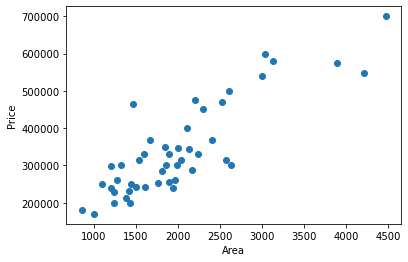

In [3]:
# Visually explore the relationship between "area" and "price"
X = data['area'].values
y = data['price'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

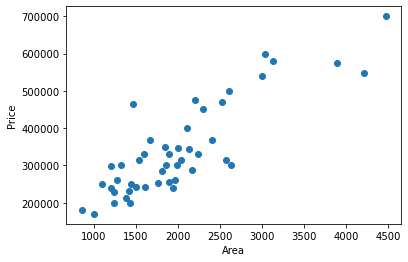

In [4]:
# Visually explore the relationship between "area" and "price"
X = data['area'].values
y = data['price'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Split data into `train` and `test` using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn library.

In [5]:
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
X_train = np.reshape(X_train, (-1, 1))  # change from 1D array to 2D array
X_test = np.reshape(X_test, (-1, 1))
print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (37, 1)
training data label shape: (37,)
test data feature space shape: (10, 1)
test data label shape: (10,)


In [6]:
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
X_train = np.reshape(X_train, (-1, 1))  # change from 1D array to 2D array
X_test = np.reshape(X_test, (-1, 1))
print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (37, 1)
training data label shape: (37,)
test data feature space shape: (10, 1)
test data label shape: (10,)


Looking at the shape of train and test sets, we can say that out of total 47 samples, 37 samples are in training and the remaining 10 samples are in test. 

### Model Development (or model training)

In [7]:
# Build linear regression model
from sklearn import linear_model as lm
ordinaryLRmodel = lm.LinearRegression()
ordinaryLRmodel.fit(X_train, y_train)

LinearRegression()

In [8]:
# Print the coefficients
print("coefficient:", ordinaryLRmodel.coef_)
print("intercept:", ordinaryLRmodel.intercept_)

coefficient: [135.08449011]
intercept: 75180.3485887426


### Plotting regression line

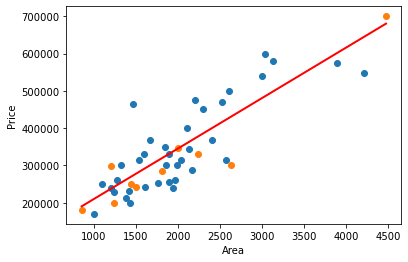

In [9]:
# Plot the model
x_line=[X.min(), X.max()]
y_line=[ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.min(), ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.max()]
plt.plot(x_line, y_line, 'r', lw=2)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Model Evaluation (on test set)

In [10]:
# Prediction/Testing
y_pred = ordinaryLRmodel.predict(X_test)
y_pred

array([319818.36017783, 237281.73672066, 431398.14900864, 345349.32880861,
       680088.69530103, 190272.33416241, 276996.57681299, 269296.76087672,
       377499.43745478, 242144.77836462])

In [11]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Mean squared error: 2837073608.67
Coefficient of determination: 0.85


## Ordinary linear regression model on multi-dimensional features/variables

In [12]:
# Data preparatoin
X = data[['area', 'bedroom']].values
y = data['price'].values
print(X.shape)
print(y.shape)


(47, 2)
(47,)


### Split data into training and testing sets

In [13]:
# Write your code here
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=142)

print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (37, 2)
training data label shape: (37,)
test data feature space shape: (10, 2)
test data label shape: (10,)


### Build linear regression model

In [14]:
# Write your code here
# Build linear regression model
from sklearn import linear_model as lm
model = lm.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Check model coefficients and comment

In [15]:
# Write your code here
print("Intercept: ", model.intercept_)
print("coefficients: ",model.coef_)

Intercept:  63175.63367314084
coefficients:  [141.80327823 123.16809456]


### Do model predictions on test set

In [16]:
# Write your code here
y_pred = model.predict(X_test)
y_pred

array([265898.41598452, 338766.66580873, 243351.69474667, 370246.99357478,
       264215.41182948, 239239.39967814, 238813.98984346, 661369.12377161,
       281071.36675464, 299382.62482939])

### Get model scores in terms of MSE and r^2 scores

In [17]:
# Write your code here
print("MSE: ", mean_squared_error(y_test,y_pred))
print("R2 score: ", r2_score(y_test,y_pred))

MSE:  4262225572.052054
R2 score:  0.5763783233257807


## Ridge regression and hyperparameter tuning

In [18]:
# Data preparatoin
X = data[['area', 'bedroom']].values
y = data['price'].values

# Data standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))

y = np.reshape(y, (-1, 1))  
ss.fit(y.astype(np.float))
y = ss.transform(y.astype(np.float))

### Split data into training and test sets

In [55]:
# Write your code here
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (8, 5)
training data label shape: (8,)
test data feature space shape: (2, 5)
test data label shape: (2,)


### Build linear regression model

In [56]:
# Write your code here
# Build linear regression model
from sklearn import linear_model as lm
model = lm.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Check model coefficients

In [57]:
# Write your code here
print("Intercept: ", model.intercept_)
print("coefficients: ",model.coef_)

Intercept:  1.0909934538777324
coefficients:  [ 1.07618698 -0.09084277 -1.20153504 -0.09099214  1.65971667]


### Do model predictions on test set

In [58]:
# Write your code here
y_pred = model.predict(X_test)
y_pred

array([0.92510328, 0.7665607 ])

### Get model scores in terms of MSE and r^2 scores

In [59]:
# Write your code here
print("MSE: ", mean_squared_error(y_test,y_pred))
print("R2 score: ", r2_score(y_test,y_pred))

MSE:  0.7301760034007643
R2 score:  0.16233040760751805


### Model hyper-parameter tuning

In [88]:
# Tune the model hypberparameter alpha (See lecture notes)
# Write your code here
from sklearn.linear_model import Ridge
import numpy as np
ridgeModel = Ridge(alpha=10)
ridgeModel.fit(X_train, y_train)
Ridge()

Ridge()

In [89]:
print("Intercept: ", model.intercept_)
print("coefficients: ",model.coef_)

Intercept:  1.0909934538777324
coefficients:  [ 1.07618698 -0.09084277 -1.20153504 -0.09099214  1.65971667]


In [90]:
y_pred = model.predict(X_test)
y_pred

array([0.92510328, 0.7665607 ])

In [91]:
print("MSE: ", mean_squared_error(y_test,y_pred))
print("R2 score: ", r2_score(y_test,y_pred))

MSE:  0.7301760034007643
R2 score:  0.16233040760751805


### Summary
Changing the value of alpha does not change the results much. I have tried the normal bounds of alpha (0-1). Theoritically, increasing alpha should result is lesser values of R^2. But in this case, the data might not be large enough to show the significance of ridge regression. Less features in the data may also be a reason for this.
